In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=a6eb3f2cb147a28bf761ea7d03975bda629c55c32dca667775e685fe225b862e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime
# import plotly.graph_objects as go
import pandas_ta as ta

In [ ]:

data = yf.download(tickers = 'GOOG')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600
2024-03-06,134.240005,134.740005,131.949997,132.559998,132.559998,23175200


In [ ]:
# fig = go.Figure(data=[go.Candlestick(
#                 open=data['Open'],
#                 high=data['High'],
#                 low=data['Low'],
#                 close=data['Close'])])

# fig.show()

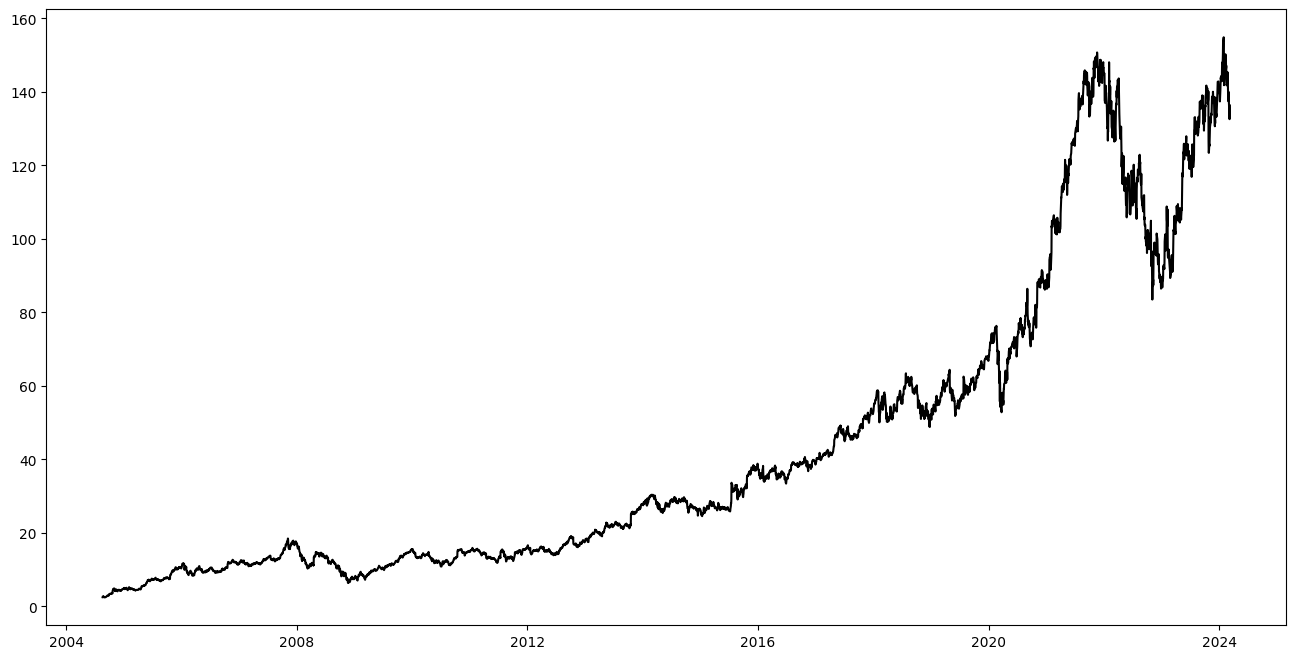

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data["Adj Close"], color = 'black', label = 'Price')

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600
2024-03-06,134.240005,134.740005,131.949997,132.559998,132.559998,23175200


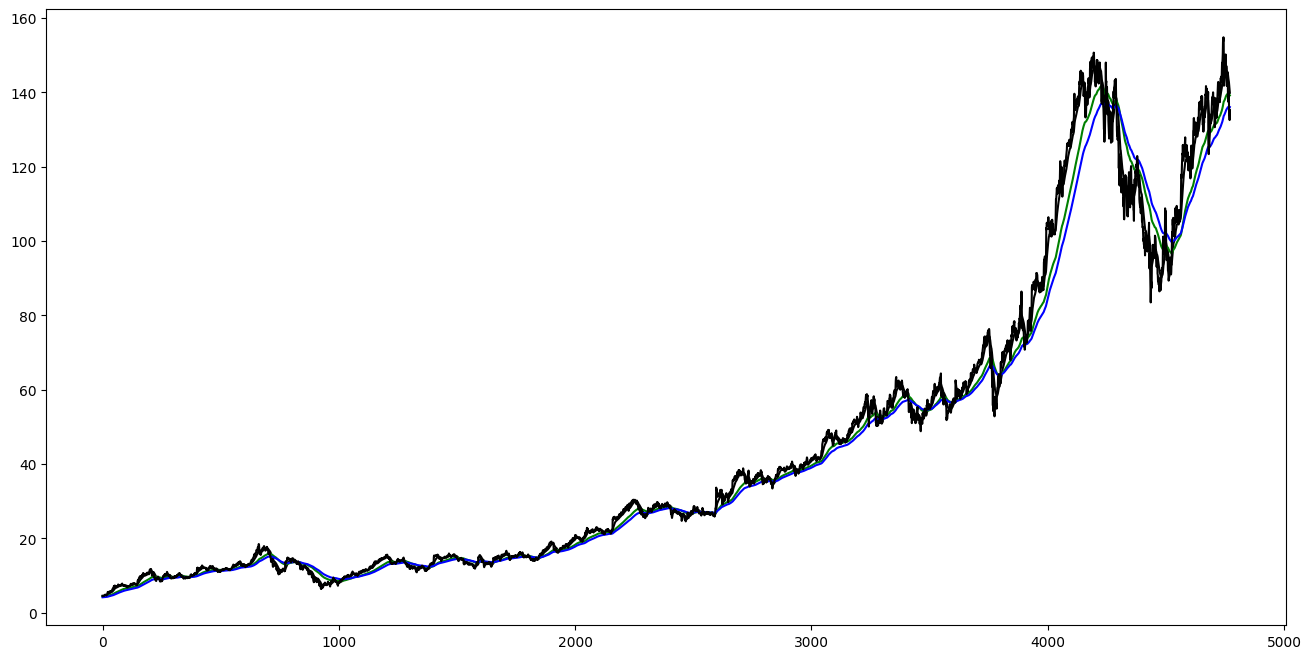

In [ ]:
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
plt.figure(figsize=(16,8))
# plt.plot(data["Adj Close"], color = 'black', label = 'Price')
# plt.plot(data["RSI"], color = 'black', label = 'Price')
plt.plot(data["EMAF"], color = 'black', label = 'Price')
plt.plot(data["EMAM"], color = 'green', label = 'Price')
plt.plot(data["EMAS"], color = 'blue', label = 'Price')

plt.plot(data["Adj Close"], color = 'black', label = 'Price')
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data_set = data

In [ ]:
target_col = "TargetNextClose"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_data = MinMaxScaler(feature_range=(0,1))
sc_response = MinMaxScaler(feature_range=(0,1))

response_scaled = sc_response.fit_transform(data_set[[target_col]])
# print(response_scaled)
# print(data_set.loc[:, data_set.columns != target_col])
# print(response_scaled)
data_set_scaled = sc_data.fit_transform(data_set.loc[:, data_set.columns != target_col])
print(data_set_scaled.shape)
# print(data_set_scaled)
print(len(data_set_scaled))
data_set_scaled_new = []
for i in range(len(data_set_scaled)):
    data_set_scaled_new.append([])
    # print(response_scaled[i][0])

    # print(data_set_scaled[i])
    data_set_scaled_new[i] = np.append(data_set_scaled[i],response_scaled[i])
    # print(data_set_scaled_new[i])
    # print("#"*80)

data_set_scaled_new = np.asarray(data_set_scaled_new)
print(data_set_scaled_new)

(4772, 10)
4772
[[3.32815299e-06 0.00000000e+00 5.53468672e-05 ... 4.57107723e-01
  0.00000000e+00 0.00000000e+00]
 [4.57914321e-04 1.02466749e-04 2.61658127e-04 ... 4.59194782e-01
  0.00000000e+00 3.59411194e-04]
 [6.21095830e-04 7.53595387e-04 5.55173777e-04 ... 4.57055107e-01
  0.00000000e+00 5.29997062e-05]
 ...
 [8.57799882e-01 8.59466015e-01 8.56090028e-01 ... 3.41348654e-01
  0.00000000e+00 8.51837555e-01]
 [8.67828104e-01 8.64243384e-01 8.58783669e-01 ... 5.54715067e-01
  1.00000000e+00 8.69659662e-01]
 [8.65488145e-01 8.71409438e-01 8.63565002e-01 ... 5.48024232e-01
  1.00000000e+00 8.76642103e-01]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled_new.shape[0])
for j in range(8):#data_set_scaled_new[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled_new.shape[0]):#backcandles+2
        X[j].append(data_set_scaled_new[i-backcandles:i, j])

#move axis from 0 to position 2
print(X)
X=np.moveaxis(X, [0], [2])
print(X)
#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled_new[backcandles:,-1])
print(yi.shape)
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

4772


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

3793
(3793, 30, 8)
(949, 30, 8)
(3793, 1)
(949, 1)
[[0.00807776]
 [0.0077465 ]
 [0.00804132]
 ...
 [0.44137506]
 [0.44542822]
 [0.4463925 ]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
228/228 [==============================] - 11s 40ms/step - loss: 7.8170e-04 - val_loss: 2.0408e-04
Epoch 2/30
228/228 [==============================] - 7s 31ms/step - loss: 2.9996e-05 - val_loss: 1.9305e-04
Epoch 3/30
228/228 [==============================] - 9s 38ms/step - loss: 2.8404e-05 - val_loss: 1.5730e-04
Epoch 4/30
228/228 [==============================] - 9s 39ms/step - loss: 2.2781e-05 - val_loss: 1.7164e-04
Epoch 5/30
228/228 [==============================] - 7s 31ms/step - loss: 2.4865e-05 - val_loss: 1.9418e-04
Epoch 6/30
228/228 [==============================] - 8s 36ms/step - loss: 2.3897e-05 - val_loss: 1.7115e-04
Epoch 7/30
228/228 [==============================] - 8s 35ms/step - loss: 2.6283e-05 - val_loss: 1.6806e-04
Epoch 8/30
228/228 [==============================] - 8s 34ms/step - loss: 2.2812e-05 - val_loss: 2.4721e-04
Epoch 9/30
228/228 [==============================] - 8s 37ms/step - loss: 2.5372e-05 - val_loss: 1.7857e-04
Epoch 10/30
228/22

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

30/30 [==============================] - 1s 22ms/step
[0.45169312] [0.44885298]
[0.45310405] [0.44790869]
[0.45532152] [0.43986217]
[0.45578387] [0.44857703]
[0.4483217] [0.45131016]
[0.45405707] [0.45448555]
[0.45724156] [0.45770751]
[0.46179098] [0.43708911]
[0.46542355] [0.44019464]
[0.44689173] [0.44241245]


In [ ]:
print(sc_response.inverse_transform(y_test)[0])
print(sc_response.inverse_transform(y_pred)[0])

[71.96099854]
[72.388084]


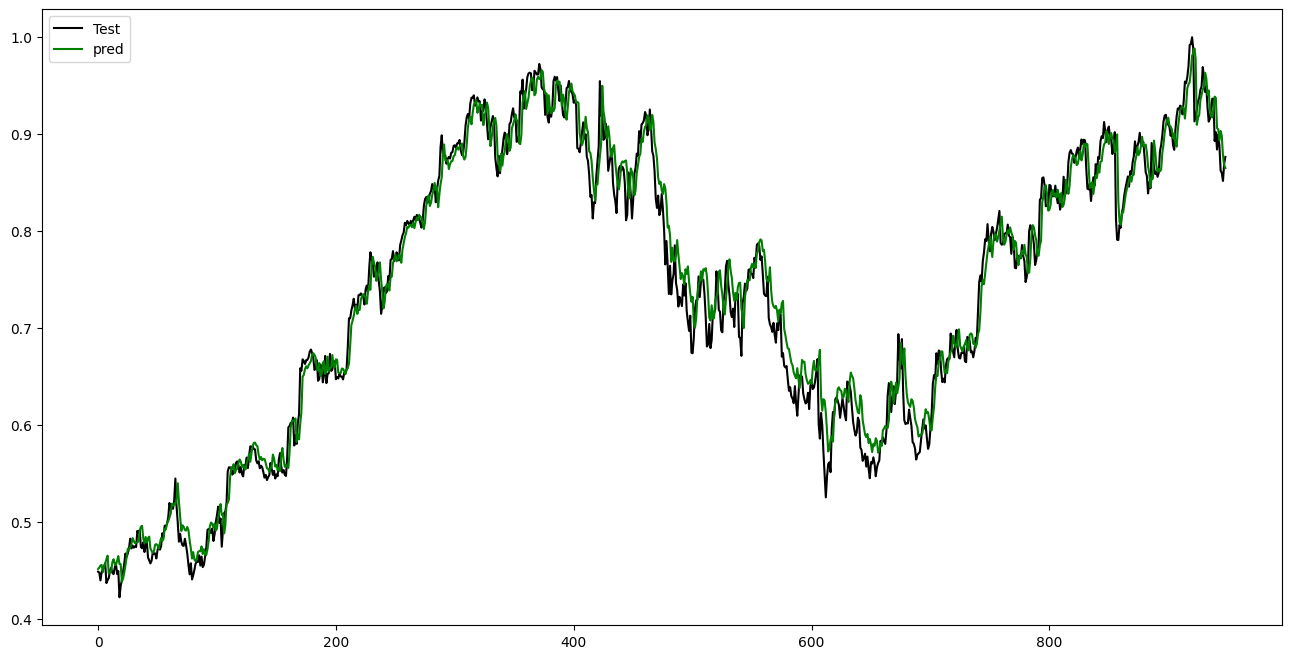

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()